# ASE-CP2K Scaling

Testing HPC Performance for ASE-CP2K on a system of 64 water molecules. All times reported are the time to complete the first SCF cycle with no starting wavefunction.

## Shadow SLURM Script

## Analysis

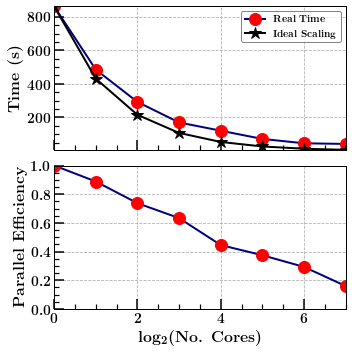

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

x = np.array([1, 2, 4, 8, 16, 32, 64, 128])
treal = np.array([861.572, 484.955,292.135, 170.014, 120.863, 71.891, 45.907, 42.042])


def GetIdealScaling(t1,length):
    '''Returns an array for Ideal Parallel Scaling
    t1 -> Time it takes on a single processor
    length -> Length of the array
    '''
    tideal = [t1]
    for i in range(1, length):
        divisor = 2**i
        tideal.append(t1 / divisor)
    return np.array(tideal)
    
tideal = GetIdealScaling(treal[0], len(treal))

def GetParallelEfficiency(processors, times):
    '''Returns array of Parallel Efficiencies'''
    E = []
    t1 = times[0]
    for p, t in zip(processors, times):
        E.append(t1 / p / t)
    return np.array(E)


fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(5,5), sharex=True)
ax[0].plot(np.log2(x),treal, marker="o", markersize=12, color="navy", markerfacecolor='r', markeredgecolor="r", label=r" \bf Real Time")
ax[0].plot(np.log2(x),tideal, marker="*", markersize=12, color="k", markerfacecolor='k', markeredgecolor="k", label=r"\bf Ideal Scaling")
ax[0].set_ylabel(r'\bf Time (s)')
ax[0].legend()

ax[1].plot(np.log2(x), GetParallelEfficiency(x, treal), marker="o", markersize=12, color="navy", markerfacecolor='r', markeredgecolor="r")
ax[1].set_xlabel(r'\bf log$_2$(No. Cores)')
ax[1].set_ylabel(r'\bf Parallel Efficiency')
ax[1].set_ylim(0,1)
plt.tight_layout()
plt.show()